order key:  order5
order key:  order6
Initializing 2  clusters  {'Cluster_1': [], 'Cluster_2': []}
cluster centroids [[22.531868977414764, 88.36361197303634], [22.53434090743829, 88.36166405950915]]
Press enter to proceed


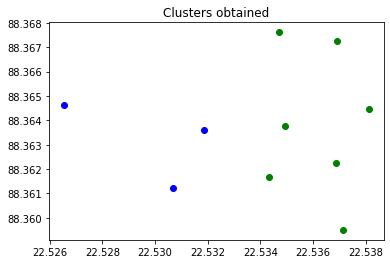

order key:  order3
order key:  order4
order key:  order5
Initializing 3  clusters  {'Cluster_1': [], 'Cluster_2': [], 'Cluster_3': []}
cluster centroids [[22.538102048963353, 88.36447806964026], [22.52655231178586, 88.36464046276582], [22.531868977414764, 88.36361197303634]]
Press enter to proceed


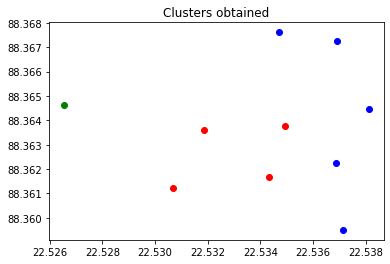

order key:  order4
order key:  order5
order key:  order6
order key:  order7
Initializing 4  clusters  {'Cluster_1': [], 'Cluster_2': [], 'Cluster_3': [], 'Cluster_4': []}
cluster centroids [[22.52655231178586, 88.36464046276582], [22.531868977414764, 88.36361197303634], [22.53434090743829, 88.36166405950915], [22.534697655790154, 88.36761856348906]]
Press enter to proceed


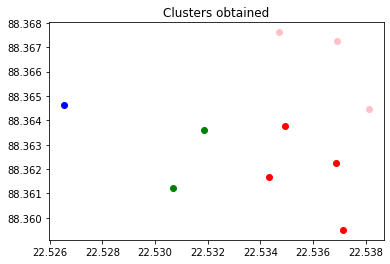

order key:  order3
order key:  order4
order key:  order5
order key:  order6
order key:  order7
Initializing 5  clusters  {'Cluster_1': [], 'Cluster_2': [], 'Cluster_3': [], 'Cluster_4': [], 'Cluster_5': []}
cluster centroids [[22.538102048963353, 88.36447806964026], [22.52655231178586, 88.36464046276582], [22.531868977414764, 88.36361197303634], [22.53434090743829, 88.36166405950915], [22.534697655790154, 88.36761856348906]]
Press enter to proceed


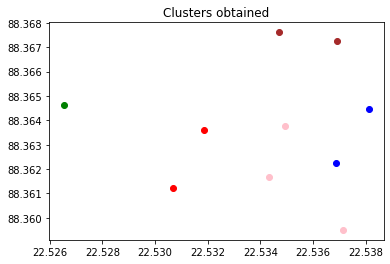

order key:  order3
order key:  order4
order key:  order5
order key:  order6
order key:  order7
order key:  order8
Initializing 6  clusters  {'Cluster_1': [], 'Cluster_2': [], 'Cluster_3': [], 'Cluster_4': [], 'Cluster_5': [], 'Cluster_6': []}
cluster centroids [[22.538102048963353, 88.36447806964026], [22.52655231178586, 88.36464046276582], [22.531868977414764, 88.36361197303634], [22.53434090743829, 88.36166405950915], [22.534697655790154, 88.36761856348906], [22.53067427371484, 88.3612027195551]]
Press enter to proceed


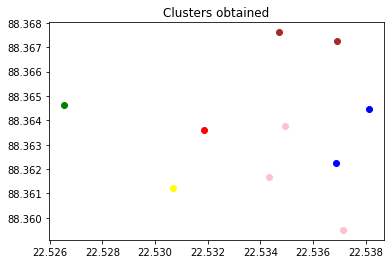

Final clusters chosen(based on within cluster minimum distance):  {'Cluster_1': array([[22.53715211, 88.35949801],
       [22.53810205, 88.36447807],
       [22.53469766, 88.36761856],
       [22.53685795, 88.36226487],
       [22.53690749, 88.36727524]]), 'Cluster_2': array([[22.52655231, 88.36464046]]), 'Cluster_3': array([[22.53491567, 88.36375618],
       [22.53186898, 88.36361197],
       [22.53434091, 88.36166406],
       [22.53067427, 88.36120272]])}


In [21]:
import json
import numpy as np
import matplotlib.pyplot as plt
from gmplot import *
import random
import copy


def get_distance(dest_point_latitude, dest_point_longitude, Latitude, Longitude):
	'''
	Haversine distance between the two latitude, longitude pairs. Returns the distance value in meters.
	'''
	#Haversine formula nearest straight line distance
	import math
	constant_fraction=math.pi/180;
	Latitude=Latitude*constant_fraction#Convert to radian
	Longitude=Longitude*constant_fraction
	R=6371;#Radius of the earth 

	dest_lat=dest_point_latitude*constant_fraction
	dest_long=dest_point_longitude*constant_fraction

	delta_lat=dest_lat-Latitude
	delta_long=dest_long-Longitude

	a=math.sin(delta_lat/2)*math.sin(delta_lat/2)+math.cos(Latitude)*math.cos(dest_lat)*math.sin(delta_long/2)*math.sin(delta_long/2)

	c=2*math.atan2(math.sqrt(a), math.sqrt(1-a))
	distance=math.ceil(R*c*1000)
	return distance

def get_data(filename):
	'''
	Read and return contents of json file.
	'''
	import json
	with  open(filename, "r") as f:
		file_contents=json.load(f)
	return file_contents

def get_random_number(N):
	'''
	Return a random number in the range 1 to N to help in initial cluster centroid selection
	'''
	return random.randint(1, N)

def get_Within_Cluster_SS(cluster_centroids, clusters):
	'''
	Within cluster distance using Haversine distance between all points in a cluster and the corresponding cluster centroid point. Add up the values obtained for all clusters.
	'''
	pos=0
	answer=0
	cluster_centroids=np.asarray(cluster_centroids)
	for key, value in clusters.items():
		value = np.asarray(value)
		for item in value:
			answer = answer + get_distance(item[0], item[1], cluster_centroids[pos][0], cluster_centroids[pos][1]);

	return answer

def plot_clusters(data):
	'''
	Plot the clusters in different colors to visualize the results of clustering.
	'''
	plt.title("Clusters obtained")
	colors = ['blue', 'green', 'red', 'pink', 'brown', 'yellow']
	pos=0
	for key, value in data.items():
		plt.scatter(value[:,0], value[:,1], color=colors[pos])
		pos=(pos+1)%len(colors)
	plt.show()


def plot_clusters_on_map(data):
	'''
	Plot the clusters on a Google Map
	'''
	# First two arugments are the geogrphical coordinates .i.e. Latitude and Longitude
	#and the zoom resolution.
	gmap = gmplot.GoogleMapPlotter(22.533092280929473, 88.36490416798092, 10)
	colors = ['green', 'red', 'pink', 'brown', 'yellow', 'black','orange', 'purple', 'cyan', 'magenta']
	pos=0
	for key, value in data.items():
		for index, item in enumerate(value):
			gmap.scatter([item[0]], [item[1]], color=colors[pos], size=6, marker=True, label=str(index))
		pos=pos+1
	gmap.draw( "map_clusters_KMEANS.html" )


def perform_clustering():
	'''
	Perform clustering on points defined in data_for_clustering.json file and return the clusters obtained as a dictionary with the following schema { "Cluster_1": List of (latitude, longitude pairs), "Cluster_2": List of (latitude, longitude pairs)}
	'''
	file_contents=get_data("/content/drive/My Drive/Colab Notebooks/emotionRec/data_for_clustering.json")


	clusters={}
	answer = 0
	WSS=[]
	trial_clusters=[]
	for i in range(2, 7):
		cluster_centroids=[]
		start_index=get_random_number(5)
		for j in range(1, i+1):
			order_key="order"+str((start_index+j)%10+1)
			print("order key: ", order_key)
			clusters["Cluster_"+str(j)]=[]
			cluster_centroids.append([ file_contents[order_key]["Latitude"], file_contents[order_key]["Longitude"]   ])

		print("Initializing", j, " clusters " , clusters)
		print("cluster centroids", cluster_centroids)
		input("Press enter to proceed")

		while(True):
			for key, value in file_contents.items():
				distances = [ get_distance(value["Latitude"], value["Longitude"], x[0], x[1]) for x in cluster_centroids ]
				distances = np.asarray(distances)
				cluster_number = np.where(distances == np.min(distances))[0][0]+1
				clusters["Cluster_"+str(cluster_number)].append([ value["Latitude"], value["Longitude"]])
				
			for key, value in clusters.items():
				clusters[key]=np.asarray(value)

			means_array = [ np.mean(value, axis=0) for key, value in clusters.items()]
			pos=0
			flag=-1
			for term in cluster_centroids:
				if(get_distance(means_array[pos][0], means_array[pos][1], term[0],term[1]) > 1e-07):
					cluster_centroids[pos]=means_array[pos]
				else:
					flag=0
					break
				pos=pos+1
			if(flag==0):
				break
			for j in range(1, i+1):
				clusters["Cluster_"+str(j)]=[]


		answer = get_Within_Cluster_SS(cluster_centroids, clusters)
		if(len(WSS)==0 or (len(WSS)>0 and np.min(WSS)> answer)):
			trial_clusters=copy.deepcopy(clusters)
		WSS.append(answer)
		plot_clusters(clusters)

	
	clusters = trial_clusters
	return clusters


clusters = perform_clustering()
print("Final clusters chosen(based on within cluster minimum distance): ", clusters)
plot_clusters_on_map(clusters)